Trabajaremos con la base ya procesada, y abrimos la otra de referencia:

In [1]:
import pandas as pd
import numpy as np
path="C:/Users/HUGO/Desktop/Maestria en CIENCIA DE DATOS UANL/Aprendizaje automatico/"
pd.set_option("display.max_columns",None)

In [2]:
loansprev=pd.read_csv(path+"loansmodified3.csv")
loans_dummies=pd.read_csv(path+"loans_dummies.csv")
loans_dummies #ya escalada

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail
0,0.082601,0.002500,0.002963,0.0,0.006996,0.010003,0.005912,0.910632,0,1,1,0,0,0,0,1,0,0,0,0,0
1,0.105448,0.000250,0.011089,0.0,0.000000,0.035010,0.020692,0.278505,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.147627,0.000875,0.001529,0.0,0.000000,0.005590,0.003304,0.254622,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0.084359,0.000125,0.001052,0.0,0.000000,0.004119,0.002434,0.241525,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.147627,0.006876,0.009368,0.0,0.000000,0.029715,0.017562,0.248844,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313089,0.024605,0.003125,0.001052,0.0,0.003736,0.004119,0.004260,0.232280,0,0,0,0,0,1,1,0,1,0,0,0,0
313090,0.442882,0.000625,0.081073,0.0,0.000000,0.250397,0.222074,0.232280,1,1,0,0,0,0,1,0,0,0,1,0,0
313091,0.147627,0.000125,0.001052,0.0,0.000000,0.004119,0.004260,0.232280,0,0,0,0,0,0,1,0,0,0,1,0,0
313092,0.147627,0.000625,0.000096,0.0,0.000000,0.001177,0.001304,0.232280,0,0,0,0,0,1,1,0,0,0,1,0,0


In [3]:
loansprev

,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,paid,ChgOffPrinGr,GrAppv,SBA_Appv,business,ID,same_state,APPROVALtimestamp,DISBURSEMENTtimestamp,timediff,Terms_comp,NAICStwo_digits,NAICS_cat2
0,2000-01-04,47,20,1.0,0,0,2.0,1.0,0,2004-10-31,35000.0,0.0,0.0,13722.0,35000.0,17500.0,1,507,0.0,9.469440e+08,1.099181e+09,152236800.0,1.0,23,Construction
1,2000-01-31,60,2,2.0,0,0,1.0,0.0,0,2000-05-31,120000.0,0.0,1.0,0.0,120000.0,60000.0,2,509,0.0,9.492768e+08,9.597312e+08,10454400.0,1.0,0,Other
2,2000-02-01,84,7,2.0,0,0,1.0,0.0,0,2000-03-31,20000.0,0.0,1.0,0.0,20000.0,10000.0,3,512,0.0,9.493632e+08,9.544608e+08,5097600.0,1.0,0,Other
3,2000-02-04,48,1,2.0,0,0,1.0,0.0,0,2000-02-29,15000.0,0.0,1.0,0.0,15000.0,7500.0,4,514,0.0,9.496224e+08,9.517824e+08,2160000.0,1.0,0,Other
4,2000-02-16,84,55,2.0,0,0,1.0,0.0,0,2000-03-31,102000.0,0.0,1.0,0.0,102000.0,51000.0,5,516,0.0,9.506592e+08,9.544608e+08,3801600.0,1.0,72,Accommodation and food services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313089,2005-12-30,14,25,1.0,1,1,1.0,0.0,0,2005-12-31,15000.0,0.0,0.0,7327.0,15000.0,12750.0,276108,879716,0.0,1.135901e+09,1.135987e+09,86400.0,1.0,62,Health care and social assistance
313090,2005-12-30,252,5,2.0,0,1,2.0,0.0,0,2005-12-31,852100.0,0.0,1.0,0.0,852100.0,639075.0,276109,879727,0.0,1.135901e+09,1.135987e+09,86400.0,NaN,48,Other
313091,2005-12-30,84,1,1.0,0,1,1.0,0.0,0,2005-12-31,15000.0,0.0,1.0,0.0,15000.0,12750.0,276110,879807,0.0,1.135901e+09,1.135987e+09,86400.0,1.0,51,Other
313092,2005-12-30,84,5,1.0,1,1,1.0,0.0,0,2005-12-31,5000.0,0.0,1.0,0.0,5000.0,4250.0,276111,879868,0.0,1.135901e+09,1.135987e+09,86400.0,1.0,42,Other


In [4]:
loansprev["paid"].value_counts(normalize=True)

1.0    0.821325
0.0    0.178675
Name: paid, dtype: float64

In [5]:
loansprev["paid"].value_counts()

1.0    257152
0.0     55942
Name: paid, dtype: int64

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

## TEST 1: Trabajar con modelo no balanceado

In [129]:
loans_dummies.drop("ChgOffPrinGr",axis=1)

,Term,NoEmp,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail,paid
0,0.082601,0.002500,0.002963,0.0,0.010003,0.005912,0.910632,0,1,1,0,0,0,0,1,0,0,0,0,0,0.0
1,0.105448,0.000250,0.011089,0.0,0.035010,0.020692,0.278505,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0
2,0.147627,0.000875,0.001529,0.0,0.005590,0.003304,0.254622,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0
3,0.084359,0.000125,0.001052,0.0,0.004119,0.002434,0.241525,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0
4,0.147627,0.006876,0.009368,0.0,0.029715,0.017562,0.248844,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313089,0.024605,0.003125,0.001052,0.0,0.004119,0.004260,0.232280,0,0,0,0,0,1,1,0,1,0,0,0,0,0.0
313090,0.442882,0.000625,0.081073,0.0,0.250397,0.222074,0.232280,1,1,0,0,0,0,1,0,0,0,1,0,0,1.0
313091,0.147627,0.000125,0.001052,0.0,0.004119,0.004260,0.232280,0,0,0,0,0,0,1,0,0,0,1,0,0,1.0
313092,0.147627,0.000625,0.000096,0.0,0.001177,0.001304,0.232280,0,0,0,0,0,1,1,0,0,0,1,0,0,1.0


In [70]:
X = loans_dummies.drop(["ChgOffPrinGr"],axis=1)
Y = loansprev[['paid']]

In [71]:
Y.value_counts(normalize=True)

paid
1.0     0.821325
0.0     0.178675
dtype: float64

In [72]:
X_test, X_train, y_test, y_train = train_test_split(X, Y, test_size=0.80,random_state=12) # 75% training and 25% test


In [73]:
y_train['paid'].value_counts() #more balanced

1.0    205741
0.0     44735
Name: paid, dtype: int64

In [63]:
len(y_test)

62618

In [74]:
#RandomForestClassifier
loan_RFC=RandomForestClassifier(n_estimators=100,random_state=12)
loan_RFC.fit(X_train,y_train)

C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=12)

In [75]:
#Predict the response for test dataset
y_pred = loan_RFC.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

#accuracy of the model:
cmrf=confusion_matrix(y_test, y_pred)
                       
def acc(cm):
    
    acc=(cm[0][0]+cm[1][1])/cm.sum()
    return(acc) 

acc(cmrf)  #96.26%

0.9343160113705324

In [77]:
cmrf

array([[ 8530,  2677],
       [ 1436, 49975]], dtype=int64)

In [78]:
recall = cmrf[1, 1] / (cmrf[1, 0] + cmrf[1, 1]) # true positives / (false negatives + true positives)
precision = cmrf[1, 1] / (cmrf[0, 1] + cmrf[1, 1]) # true positives / (false positives + true positives)
print(recall)
print(precision)

0.9720682344245395
0.9491567271898503


In [79]:
np.sqrt(recall*precision)

0.9605441707655157

In [13]:
import matplotlib.pyplot as plt

# Define class labels
class_names = ['Paid', 'Not Paid']

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cmrf, cmap=plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add ticks
ax.set(xticks=np.arange(cmrf.shape[1]),
       yticks=np.arange(cmrf.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion matrix, All sample Data',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(cmrf.shape[0]):
    for j in range(cmrf.shape[1]):
        ax.text(j, i, format(cmrf[i, j], 'd'),
                ha="center", va="center",
                color="white" if cmrf[i, j] > cmrf.max() / 2. else "black")

fig.tight_layout()
plt.show()

<Figure size 640x480 with 2 Axes>

In [14]:
fig.savefig(path+'confusion_matrix_total.png', dpi=300)

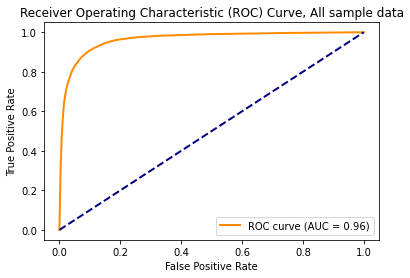

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification


# Generate synthetic data for classification
x, y = make_classification(n_samples=1000, n_classes=2, random_state=42)


# Predict probabilities for the test data
y_score = loan_RFC.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Compute area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, All sample data')
plt.legend(loc="lower right")
plt.savefig(path+'roc_curve_total.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
#Hacemos cross validation para asegurarnos de que el accuracy es alto
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Perform cross-validation
scores = cross_val_score(loan_RFC, X, Y, cv=kf, scoring='accuracy')

# Compute the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Print the mean and standard deviation of the scores
print('Mean accuracy:', mean_score)
print('Standard deviation:', std_score)

In [16]:
#De otra manera
from sklearn.model_selection import KFold, cross_val_score

scores = cross_val_score(loan_RFC, X, Y, cv=10)
scores
#array([0.94879518, 0.95858434, 0.96385542, 0.99472892, 0.99397136,
#       0.99397136, 0.99472494, 0.99698568, 0.71891485, 0.50791258])

C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:

array([0.94110508, 0.94873842, 0.91871607, 0.9049505 , 0.9221949 ,
       0.93560957, 0.94509566, 0.93685522, 0.93289469, 0.91746782])

In [18]:
print("%0.4f mean accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))


0.9304 mean accuracy with a standard deviation of 0.0133


In [80]:
#feature importance:
importances=loan_RFC.feature_importances_

# summarize feature importance
for i,v in zip(X_train.columns,enumerate(importances)):
    print('Feature: {}, Score: {}'.format(i,v))

Feature: Term, Score: (0, 0.5420976814807283)
Feature: NoEmp, Score: (1, 0.05299035075586942)
Feature: DisbursementGross, Score: (2, 0.07144533823396959)
Feature: BalanceGross, Score: (3, 1.033022405240385e-05)
Feature: GrAppv, Score: (4, 0.05561249902070961)
Feature: SBA_Appv, Score: (5, 0.06457004834927406)
Feature: timediff, Score: (6, 0.09301535659139008)
Feature: NewExist_2.0, Score: (7, 0.009643735172767013)
Feature: UrbanRural_2.0, Score: (8, 0.008154626722341242)
Feature: RevLineCr_1.0, Score: (9, 0.01973438052055102)
Feature: same_state_1.0, Score: (10, 0.02663857379646223)
Feature: LowDoc_1, Score: (11, 0.004571485423973492)
Feature: CreateJob_1, Score: (12, 0.009658208926440466)
Feature: RetainedJob_1, Score: (13, 0.007889750713327754)
Feature: NAICS_cat2_Construction, Score: (14, 0.004962107440984268)
Feature: NAICS_cat2_Health care and social assistance, Score: (15, 0.003986153083587182)
Feature: NAICS_cat2_Manufacturing, Score: (16, 0.0051417766113098515)
Feature: NAICS_c

In [81]:
# sort feature importance in descending order
sorted_indices = importances.argsort()[::-1]

# summarize feature importance
for i in sorted_indices:
    print('Feature: {}, Score: {}'.format(X_train.columns[i], importances[i]))

Feature: Term, Score: 0.5420976814807283
Feature: timediff, Score: 0.09301535659139008
Feature: DisbursementGross, Score: 0.07144533823396959
Feature: SBA_Appv, Score: 0.06457004834927406
Feature: GrAppv, Score: 0.05561249902070961
Feature: NoEmp, Score: 0.05299035075586942
Feature: same_state_1.0, Score: 0.02663857379646223
Feature: RevLineCr_1.0, Score: 0.01973438052055102
Feature: CreateJob_1, Score: 0.009658208926440466
Feature: NewExist_2.0, Score: 0.009643735172767013
Feature: NAICS_cat2_Other, Score: 0.008644530847754572
Feature: UrbanRural_2.0, Score: 0.008154626722341242
Feature: RetainedJob_1, Score: 0.007889750713327754
Feature: NAICS_cat2_Retail, Score: 0.006757837132317804
Feature: NAICS_cat2_Manufacturing, Score: 0.0051417766113098515
Feature: NAICS_cat2_Construction, Score: 0.004962107440984268
Feature: LowDoc_1, Score: 0.004571485423973492
Feature: NAICS_cat2_Professional, scientific, and technical services, Score: 0.004475228952189572
Feature: NAICS_cat2_Health care an

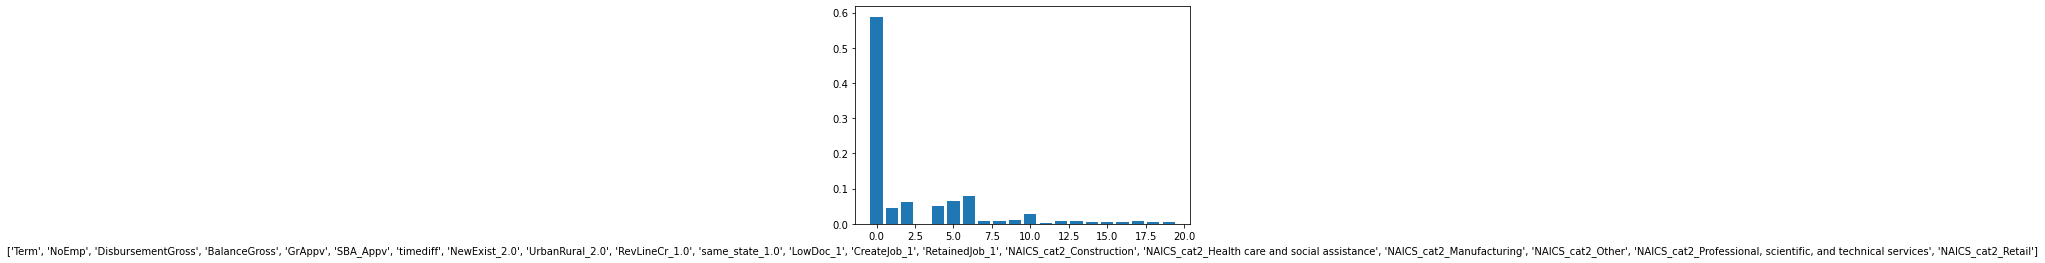

In [20]:
# plot feature importance
import matplotlib.pyplot as plt

plt.bar([x for x in range(len(importances))], importances)
plt.xlabel([x for x in X_train.columns])
plt.show()

## Con tecnica de balanceo

In [4]:
loans_dummies["paid"]=loansprev["paid"]
loans_balancedp2=loans_dummies[loans_dummies["paid"]==0]
loans_s2=loans_dummies[loans_dummies["paid"]==1].sample(round(len(loans_dummies[loans_dummies["paid"]==1])*0.75))
loans_balanced2=pd.concat([loans_balancedp2,loans_s2])
loans_balanced2.reset_index(inplace=True)
loans_balanced2.drop("index",axis=1,inplace=True)
loans_balanced2

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail,paid
0,0.082601,0.002500,0.002963,0.0,0.006996,0.010003,0.005912,0.910632,0,1,1,0,0,0,0,1,0,0,0,0,0,0.0
1,0.056239,0.000375,0.004397,0.0,0.025492,0.014416,0.008520,0.241911,1,0,1,0,0,0,0,0,1,0,0,0,0,0.0
2,0.028120,0.000750,0.001529,0.0,0.002637,0.005590,0.003304,0.264638,0,0,1,1,0,0,0,0,0,0,0,0,1,0.0
3,0.007030,0.001000,0.009100,0.0,0.050573,0.029126,0.017214,0.243837,0,0,1,1,0,0,0,0,0,0,0,1,0,0.0
4,0.021090,0.000125,0.004564,0.0,0.024594,0.029126,0.017214,0.246918,0,0,1,1,0,0,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248801,0.105448,0.000125,0.003441,0.0,0.000000,0.011474,0.011650,0.252696,1,0,0,1,1,0,0,0,0,0,1,0,0,1.0
248802,0.421793,0.001500,0.080394,0.0,0.000000,0.248308,0.293688,0.264253,0,0,0,1,0,1,0,1,0,0,0,0,0,1.0
248803,0.147627,0.000250,0.013957,0.0,0.000000,0.043836,0.044166,0.286210,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0
248804,0.147627,0.000750,0.004397,0.0,0.000000,0.014416,0.008520,0.525809,0,0,1,0,0,0,1,0,0,0,0,0,1,1.0


In [36]:
loansprev['paid'].value_counts()

1.0    257152
0.0     55942
Name: paid, dtype: int64

In [37]:
loans_balanced2['paid'].value_counts()

1.0    192864
0.0     55942
Name: paid, dtype: int64

In [38]:
55942/(len(loans_balanced2))

0.22484184465004864

In [39]:
X2 = loans_dummies.drop(["ChgOffPrinGr"],axis=1)
Y2 = loansprev[['paid']]

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target data, respectively
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=12)

# Create SMOTE object and resample the training data, 
smote = SMOTE(sampling_strategy=0.5, random_state=2) #50,50 proportion
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Original class distribution:', y_train['paid'].value_counts() )
print('Resampled class distribution:', y_train_resampled.value_counts())

Original class distribution: 1.0    205837
0.0     44638
Name: paid, dtype: int64
Resampled class distribution: paid
1.0     205837
0.0     102918
dtype: int64


In [42]:
y_train_resampled.value_counts(normalize=True)

paid
1.0     0.666668
0.0     0.333332
dtype: float64

In [43]:
loan_RFC2=RandomForestClassifier(n_estimators=100,random_state=12)
loan_RFC2.fit(X_train_resampled, y_train_resampled)

C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=12)

In [44]:
#Predict the response for test dataset
y_pred = loan_RFC2.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

#accuracy of the model:
cmrf=confusion_matrix(y_test, y_pred)
                       
def acc(cm):
    
    acc=(cm[0][0]+cm[1][1])/cm.sum()
    return(acc) 

acc(cmrf)  #96.26%

1.0

In [46]:
cmrf

array([[11304,     0],
       [    0, 51315]], dtype=int64)

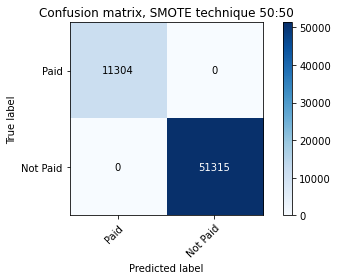

In [47]:
import matplotlib.pyplot as plt

# Define class labels
class_names = ['Paid', 'Not Paid']

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cmrf, cmap=plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add ticks
ax.set(xticks=np.arange(cmrf.shape[1]),
       yticks=np.arange(cmrf.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion matrix, SMOTE technique 50:50',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(cmrf.shape[0]):
    for j in range(cmrf.shape[1]):
        ax.text(j, i, format(cmrf[i, j], 'd'),
                ha="center", va="center",
                color="white" if cmrf[i, j] > cmrf.max() / 2. else "black")

fig.tight_layout()
plt.show()

In [48]:
fig.savefig(path+'confusion_matrix_5050.png', dpi=300)

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification


# Generate synthetic data for classification
x, y = make_classification(n_samples=1000, n_classes=2, random_state=42)


# Predict probabilities for the test data
y_score = loan_RFC.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Compute area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, SMOTE technique 50:50')
plt.legend(loc="lower right")
plt.savefig(path+'roc_curve_total.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- paid
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 21 features, but RandomForestClassifier is expecting 20 features as input.

In [50]:
#De otra manera
from sklearn.model_selection import KFold, cross_val_score

scores = cross_val_score(loan_RFC, X2, Y2, cv=10)
scores

C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
print("%0.4f mean accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))


1.0000 mean accuracy with a standard deviation of 0.0000


# Diseño de experimentos

In [8]:
#ChgOffPrinGr WAS THE VARIABLE OF TROUBLE 
loans

,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,paid,ChgOffPrinGr,GrAppv,SBA_Appv,business,ID,same_state,APPROVALtimestamp,DISBURSEMENTtimestamp,timediff,Terms_comp,NAICStwo_digits,NAICS_cat2,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail
0,04/01/2000,47,20,1.0,0,0,2.0,1.0,0,31/10/2004,35000,0,0.0,13722,35000,17500,1,507,0,946944000,1099180800,152236800,1.0,23,Construction,0,1,1,0,0,0,0,1,0,0,0,0,0
1,31/01/2000,60,2,2.0,0,0,1.0,0.0,0,31/05/2000,120000,0,1.0,0,120000,60000,2,509,0,949276800,959731200,10454400,1.0,0,Other,1,0,0,0,0,0,0,0,0,0,1,0,0
2,01/02/2000,84,7,2.0,0,0,1.0,0.0,0,31/03/2000,20000,0,1.0,0,20000,10000,3,512,0,949363200,954460800,5097600,1.0,0,Other,1,0,0,0,0,0,0,0,0,0,1,0,0
3,04/02/2000,48,1,2.0,0,0,1.0,0.0,0,29/02/2000,15000,0,1.0,0,15000,7500,4,514,0,949622400,951782400,2160000,1.0,0,Other,1,0,0,0,0,0,0,0,0,0,1,0,0
4,16/02/2000,84,55,2.0,0,0,1.0,0.0,0,31/03/2000,102000,0,1.0,0,102000,51000,5,516,0,950659200,954460800,3801600,1.0,72,Accommodation and food services,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313089,30/12/2005,14,25,1.0,1,1,1.0,0.0,0,31/12/2005,15000,0,0.0,7327,15000,12750,276108,879716,0,1135900800,1135987200,86400,1.0,62,Health care and social assistance,0,0,0,0,0,1,1,0,1,0,0,0,0
313090,30/12/2005,252,5,2.0,0,1,2.0,0.0,0,31/12/2005,852100,0,1.0,0,852100,639075,276109,879727,0,1135900800,1135987200,86400,NaN,48,Other,1,1,0,0,0,0,1,0,0,0,1,0,0
313091,30/12/2005,84,1,1.0,0,1,1.0,0.0,0,31/12/2005,15000,0,1.0,0,15000,12750,276110,879807,0,1135900800,1135987200,86400,1.0,51,Other,0,0,0,0,0,0,1,0,0,0,1,0,0
313092,30/12/2005,84,5,1.0,1,1,1.0,0.0,0,31/12/2005,5000,0,1.0,0,5000,4250,276111,879868,0,1135900800,1135987200,86400,1.0,42,Other,0,0,0,0,0,1,1,0,0,0,1,0,0


## Experiment 

In [5]:
#load loans unbalanced:
loans=pd.read_csv(path+"loansmodified4.csv")
#dealing oversampling
loans["paid"]=loansprev["paid"]
loans_balancedp=loans[loans["paid"]==0]
loans_s=loans[loans["paid"]==1].sample(len(loans_balancedp))
loans_balanced=pd.concat([loans_balancedp,loans_s])
loans_balanced.reset_index(inplace=True)
loans_balanced.drop("index",axis=1,inplace=True)
loans_balanced

loans_balanced= loans_balanced.loc[:, loans_balanced2.columns]

loans_balanced

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail,paid
0,47,20,35000,0,13722,35000,17500,152236800,0,1,1,0,0,0,0,1,0,0,0,0,0,0.0
1,32,3,50000,0,50000,50000,25000,2246400,1,0,1,0,0,0,0,0,1,0,0,0,0,0.0
2,16,6,20000,0,5172,20000,10000,7344000,0,0,1,1,0,0,0,0,0,0,0,0,1,0.0
3,4,8,99193,0,99193,100000,50000,2678400,0,0,1,1,0,0,0,0,0,0,0,1,0,0.0
4,12,1,51746,0,48239,100000,50000,3369600,0,0,1,1,0,0,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111879,240,1,377000,0,0,377000,377000,30326400,0,0,0,1,0,1,1,0,0,0,0,0,0,1.0
111880,84,2,10000,0,0,10000,5000,864000,0,0,1,0,0,1,1,0,0,0,1,0,0,1.0
111881,60,2,31000,0,0,31000,15500,4579200,0,0,0,0,0,1,1,0,0,1,0,0,0,1.0
111882,240,15,1000000,0,0,1000000,1000000,14342400,0,0,0,1,0,1,1,0,0,0,0,0,0,1.0


In [47]:
loans_balanced["ChgOffPrinGr"].describe()

count    1.118840e+05
mean     3.753163e+04
std      1.014208e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.197500e+03
75%      3.411175e+04
max      1.961398e+06
Name: ChgOffPrinGr, dtype: float64

In [21]:
mean=loans_balanced["ChgOffPrinGr"].mean()
mean

37521.69829466233

In [22]:
x1,x2=np.quantile(loans_balanced["ChgOffPrinGr"],[0.5,0.75])
x2

34085.5

In [23]:
# Define the levels of the independent variable
loans_balanced['quantile_level_chgdoff'] = np.nan
#loans_balanced.drop("quantile_level_chgdoff",axis=1,inplace=True)
loans_balanced.loc[loans_balanced["ChgOffPrinGr"]<=x1,"quantile_level_chgdoff"]="Chgdoff low"
loans_balanced.loc[(loans_balanced["ChgOffPrinGr"]>x1)&(loans_balanced["ChgOffPrinGr"]<=x2),"quantile_level_chgdoff"]="Chgdoff medium"
loans_balanced.loc[loans_balanced["ChgOffPrinGr"]>x2,"quantile_level_chgdoff"]="Chgdoff high"


# Define the treatments of the dependent variable
loans_balanced["dependent_treatment"]=loans_balanced['quantile_level_chgdoff']+"_Paid:"+loans_balanced["paid"].astype(str)
loans_balanced

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail,paid,quantile_level_chgdoff,dependent_treatment
0,47,20,35000,0,13722,35000,17500,152236800,0,1,1,0,0,0,0,1,0,0,0,0,0,0.0,Chgdoff medium,Chgdoff medium_Paid:0.0
1,32,3,50000,0,50000,50000,25000,2246400,1,0,1,0,0,0,0,0,1,0,0,0,0,0.0,Chgdoff high,Chgdoff high_Paid:0.0
2,16,6,20000,0,5172,20000,10000,7344000,0,0,1,1,0,0,0,0,0,0,0,0,1,0.0,Chgdoff medium,Chgdoff medium_Paid:0.0
3,4,8,99193,0,99193,100000,50000,2678400,0,0,1,1,0,0,0,0,0,0,0,1,0,0.0,Chgdoff high,Chgdoff high_Paid:0.0
4,12,1,51746,0,48239,100000,50000,3369600,0,0,1,1,0,0,0,0,0,1,0,0,0,0.0,Chgdoff high,Chgdoff high_Paid:0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111879,240,1,377000,0,0,377000,377000,30326400,0,0,0,1,0,1,1,0,0,0,0,0,0,1.0,Chgdoff low,Chgdoff low_Paid:1.0
111880,84,2,10000,0,0,10000,5000,864000,0,0,1,0,0,1,1,0,0,0,1,0,0,1.0,Chgdoff low,Chgdoff low_Paid:1.0
111881,60,2,31000,0,0,31000,15500,4579200,0,0,0,0,0,1,1,0,0,1,0,0,0,1.0,Chgdoff low,Chgdoff low_Paid:1.0
111882,240,15,1000000,0,0,1000000,1000000,14342400,0,0,0,1,0,1,1,0,0,0,0,0,0,1.0,Chgdoff low,Chgdoff low_Paid:1.0


In [24]:
loans_balanced["dependent_treatment"].value_counts()

Chgdoff low_Paid:1.0       55544
Chgdoff high_Paid:0.0      27937
Chgdoff medium_Paid:0.0    27606
Chgdoff low_Paid:0.0         399
Chgdoff medium_Paid:1.0      364
Chgdoff high_Paid:1.0         34
Name: dependent_treatment, dtype: int64

In [18]:
loans_balanced.quantile_level_chgdoff.value_counts()

Chgdoff high    56365
Chgdoff low     55519
Name: quantile_level_chgdoff, dtype: int64

In [19]:
print("Chgdoff low "  , (loans_balanced[loans_balanced["quantile_level_chgdoff"]=="Chgdoff low"]["paid"].value_counts()))
print("Chgdoff medium "  , (loans_balanced[loans_balanced["quantile_level_chgdoff"]=="Chgdoff medium"]["paid"].value_counts()))
print("Chgdoff high "  , (loans_balanced[loans_balanced["quantile_level_chgdoff"]=="Chgdoff high"]["paid"].value_counts()))

Chgdoff low  1.0    55516
0.0        3
Name: paid, dtype: int64
Chgdoff medium  Series([], Name: paid, dtype: int64)
Chgdoff high  0.0    55939
1.0      426
Name: paid, dtype: int64


In [70]:
#### Test

from scipy.stats import chi2_contingency

# crear una tabla de contingencia con los casos exitosos y no exitosos para cada muestra
table = [[55515, 427], [380, 27591], [47, 27924]]

# realizar la prueba de chi-cuadrado
stat, pval, dof, expected = chi2_contingency(table)

print('Estadístico de chi-cuadrado:', stat)
print("Degrees of freedom: " ,dof)
print('Valor p:', pval)

Estadístico de chi-cuadrado: 108502.00286010513
Degrees of freedom:  2
Valor p: 0.0


In [27]:
from scipy import stats
for e in loans_balanced["dependent_treatment"].unique():
    print(e)
    x=loans_balanced[loans_balanced["dependent_treatment"]==e]["ChgOffPrinGr"].values
    print(stats.kstest(x, stats.norm.cdf))    

Chgdoff medium_Paid:0.0
KstestResult(statistic=1.0, pvalue=0.0)
Chgdoff high_Paid:0.0
KstestResult(statistic=1.0, pvalue=0.0)
Chgdoff low_Paid:0.0
KstestResult(statistic=0.9924812030075187, pvalue=0.0)
Chgdoff low_Paid:1.0
KstestResult(statistic=0.5, pvalue=0.0)
Chgdoff medium_Paid:1.0
KstestResult(statistic=1.0, pvalue=0.0)
Chgdoff high_Paid:1.0
KstestResult(statistic=1.0, pvalue=0.0)


In [10]:
#### With all sample data

test=loans[["ChgOffPrinGr","paid"]]
test

,ChgOffPrinGr,paid
0,13722,0.0
1,0,1.0
2,0,1.0
3,0,1.0
4,0,1.0
...,...,...
313089,7327,0.0
313090,0,1.0
313091,0,1.0
313092,0,1.0


In [11]:
test["ChgOffPrinGr"].describe()

count    3.130940e+05
mean     1.347816e+04
std      6.325106e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.961398e+06
Name: ChgOffPrinGr, dtype: float64

In [28]:
x1,x2=np.quantile(test["ChgOffPrinGr"],[0.5,0.8])
print(x1)
print(x2)

0.0
9409.0
